# Model 0.4

Initial Position (z0) vs Capture Probability (P)
Random Seed and increments of z0

## Imports

In [2]:
%matplotlib inline 
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

np.random.seed(42)

In [3]:
filename = 'data/z0vsP01.dat'

z0vsP = pd.read_csv(filename)
z0 = z0vsP['z0'].values.reshape(-1,1)
P = z0vsP['P'].values

sort = []
for i in range(len(z0)):
    sort.append([z0[i][0],P[i]])
sort = np.array(sorted(sort, key = itemgetter(0)))
z0 = sort[:,0][:98].reshape(-1,1)
P = sort[:,1][:98]

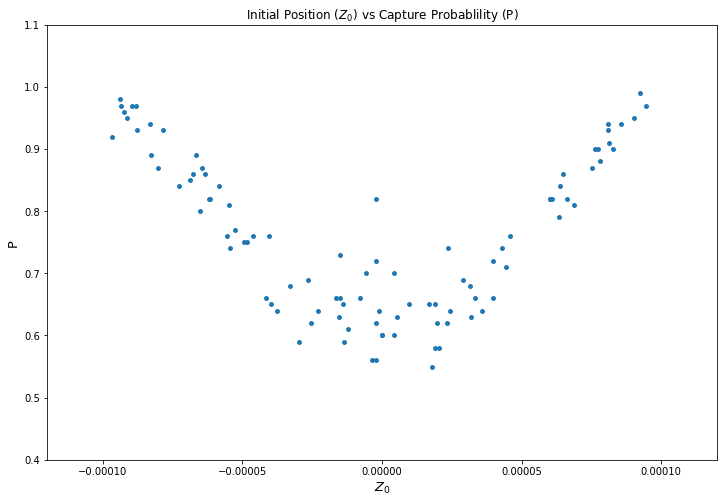

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(z0,P,s = 15)
plt.axis([-1.2e-4,1.2e-4,0.4,1.1])
plt.title("Initial Position ($Z_0$) vs Capture Probablility (P)")
plt.xlabel("$Z_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
#plt.savefig("graphs/z0vsP01-1.png")
plt.show()

## Ridge Regression

In [5]:
x_train, x_test, y_train, y_test = train_test_split(z0,P,test_size = 0.2)
alpha = 0.1
degree = 4
poly_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha =alpha))
    ])

poly_reg.fit(x_train,y_train)
y_pred = poly_reg.predict(x_test)
error_mse = mse(y_test, y_pred)
error_r2 = r2_score(y_pred, y_test)

graph_x = np.linspace(z0[0],z0[97],100).reshape(-1,1)
graph_y = poly_reg.predict(graph_x)

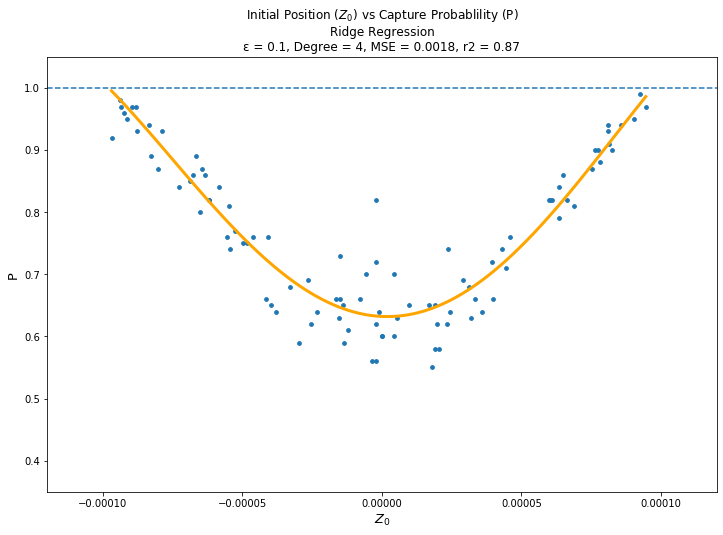

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(z0,P, s = 14)
plt.plot(graph_x, graph_y, c = 'orange', linewidth =3)
plt.axis([-1.2e-4,1.2e-4,0.35,1.05])
plt.axhline(y=1, linestyle='--')
plt.title("Initial Position ($Z_0$) vs Capture Probablility (P)\nRidge Regression\n\u03B5 = {}, Degree = {}, MSE = {:.2}, r2 = {:.2}".format(alpha,degree,error_mse,error_r2))
plt.xlabel("$Z_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
#plt.savefig("graphs/z0vsP01-2.png")
plt.show()

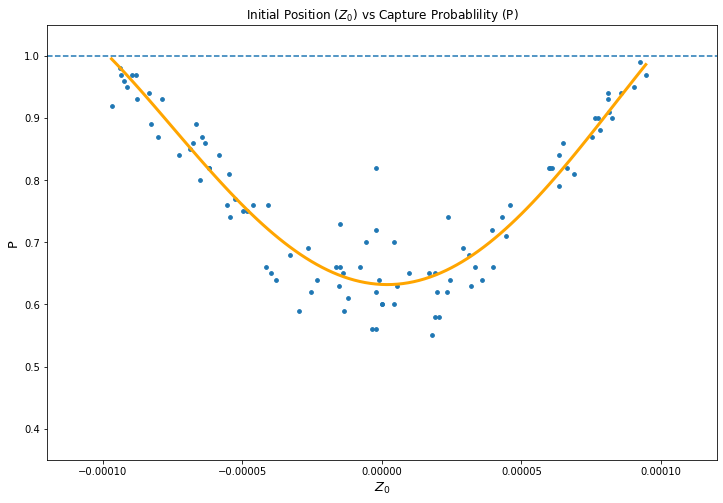

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(z0,P, s = 14)
plt.plot(graph_x, graph_y, c = 'orange', linewidth =3)
plt.axis([-1.2e-4,1.2e-4,0.35,1.05])
plt.axhline(y=1, linestyle='--')
plt.title("Initial Position ($Z_0$) vs Capture Probablility (P)")
plt.xlabel("$Z_0$", fontsize = 13)
plt.ylabel("P", fontsize = 13)
#plt.savefig("graphs/z0vsP01-3.png")
plt.show()